# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Pens and Printers
### New Products Sales Performance
Six weeks ago Pens and Printers launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.

Pen and Printers have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.
- **Email**: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.
- **Call**: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.
- **Email and call**: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would I recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

## Data Information
The data only relates to the new products sold. As there are multiple different products, the
revenue will vary depending on which products were sold.

| Column Name | Details |
| --- | --- |
| week | Week sale was made counted as weeks since product launch |
| sales_method | Character, which of the three sales methods were used for that customer |
| customer_id | Character, unique identifier for the customer |
| nb_sold | Numeric, number of new products sold |
| revenue | Numeric, revenue from the sales rounded to 2 decimal places. |
| years_as_customer | Numeric, number of years customer has been buying from us (company founded in 1984) |
| nb_site_visits | Numeric, number of times the customer has visited our website in the last 6 months |
| state | Character, location of the customer i.e. where orders are shipped |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [4]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [5]:
sales.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In [6]:
sales.week.value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

In [7]:
sales.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [8]:
# Clean "sales_method" column
to_replace = ["email", "call", "em"]
new_values = ["Email", "Call", "Email"]
for old, new in zip(to_replace, new_values):
    sales['sales_method'] = sales['sales_method'].str.replace(old, new)
print(f"sales_method distinct values after cleaning with \
value counts:\n{sales['sales_method'].value_counts()}")

sales_method distinct values after cleaning with value counts:
Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


In [9]:
# Check that all customer_id values are the same length
sales['length_id'] = sales['customer_id'].apply(len)
print(sales['length_id'].value_counts())
sales.drop('length_id', axis=1, inplace=True)

36    15000
Name: length_id, dtype: int64


In [10]:
sales.nb_sold.value_counts()

10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: nb_sold, dtype: int64

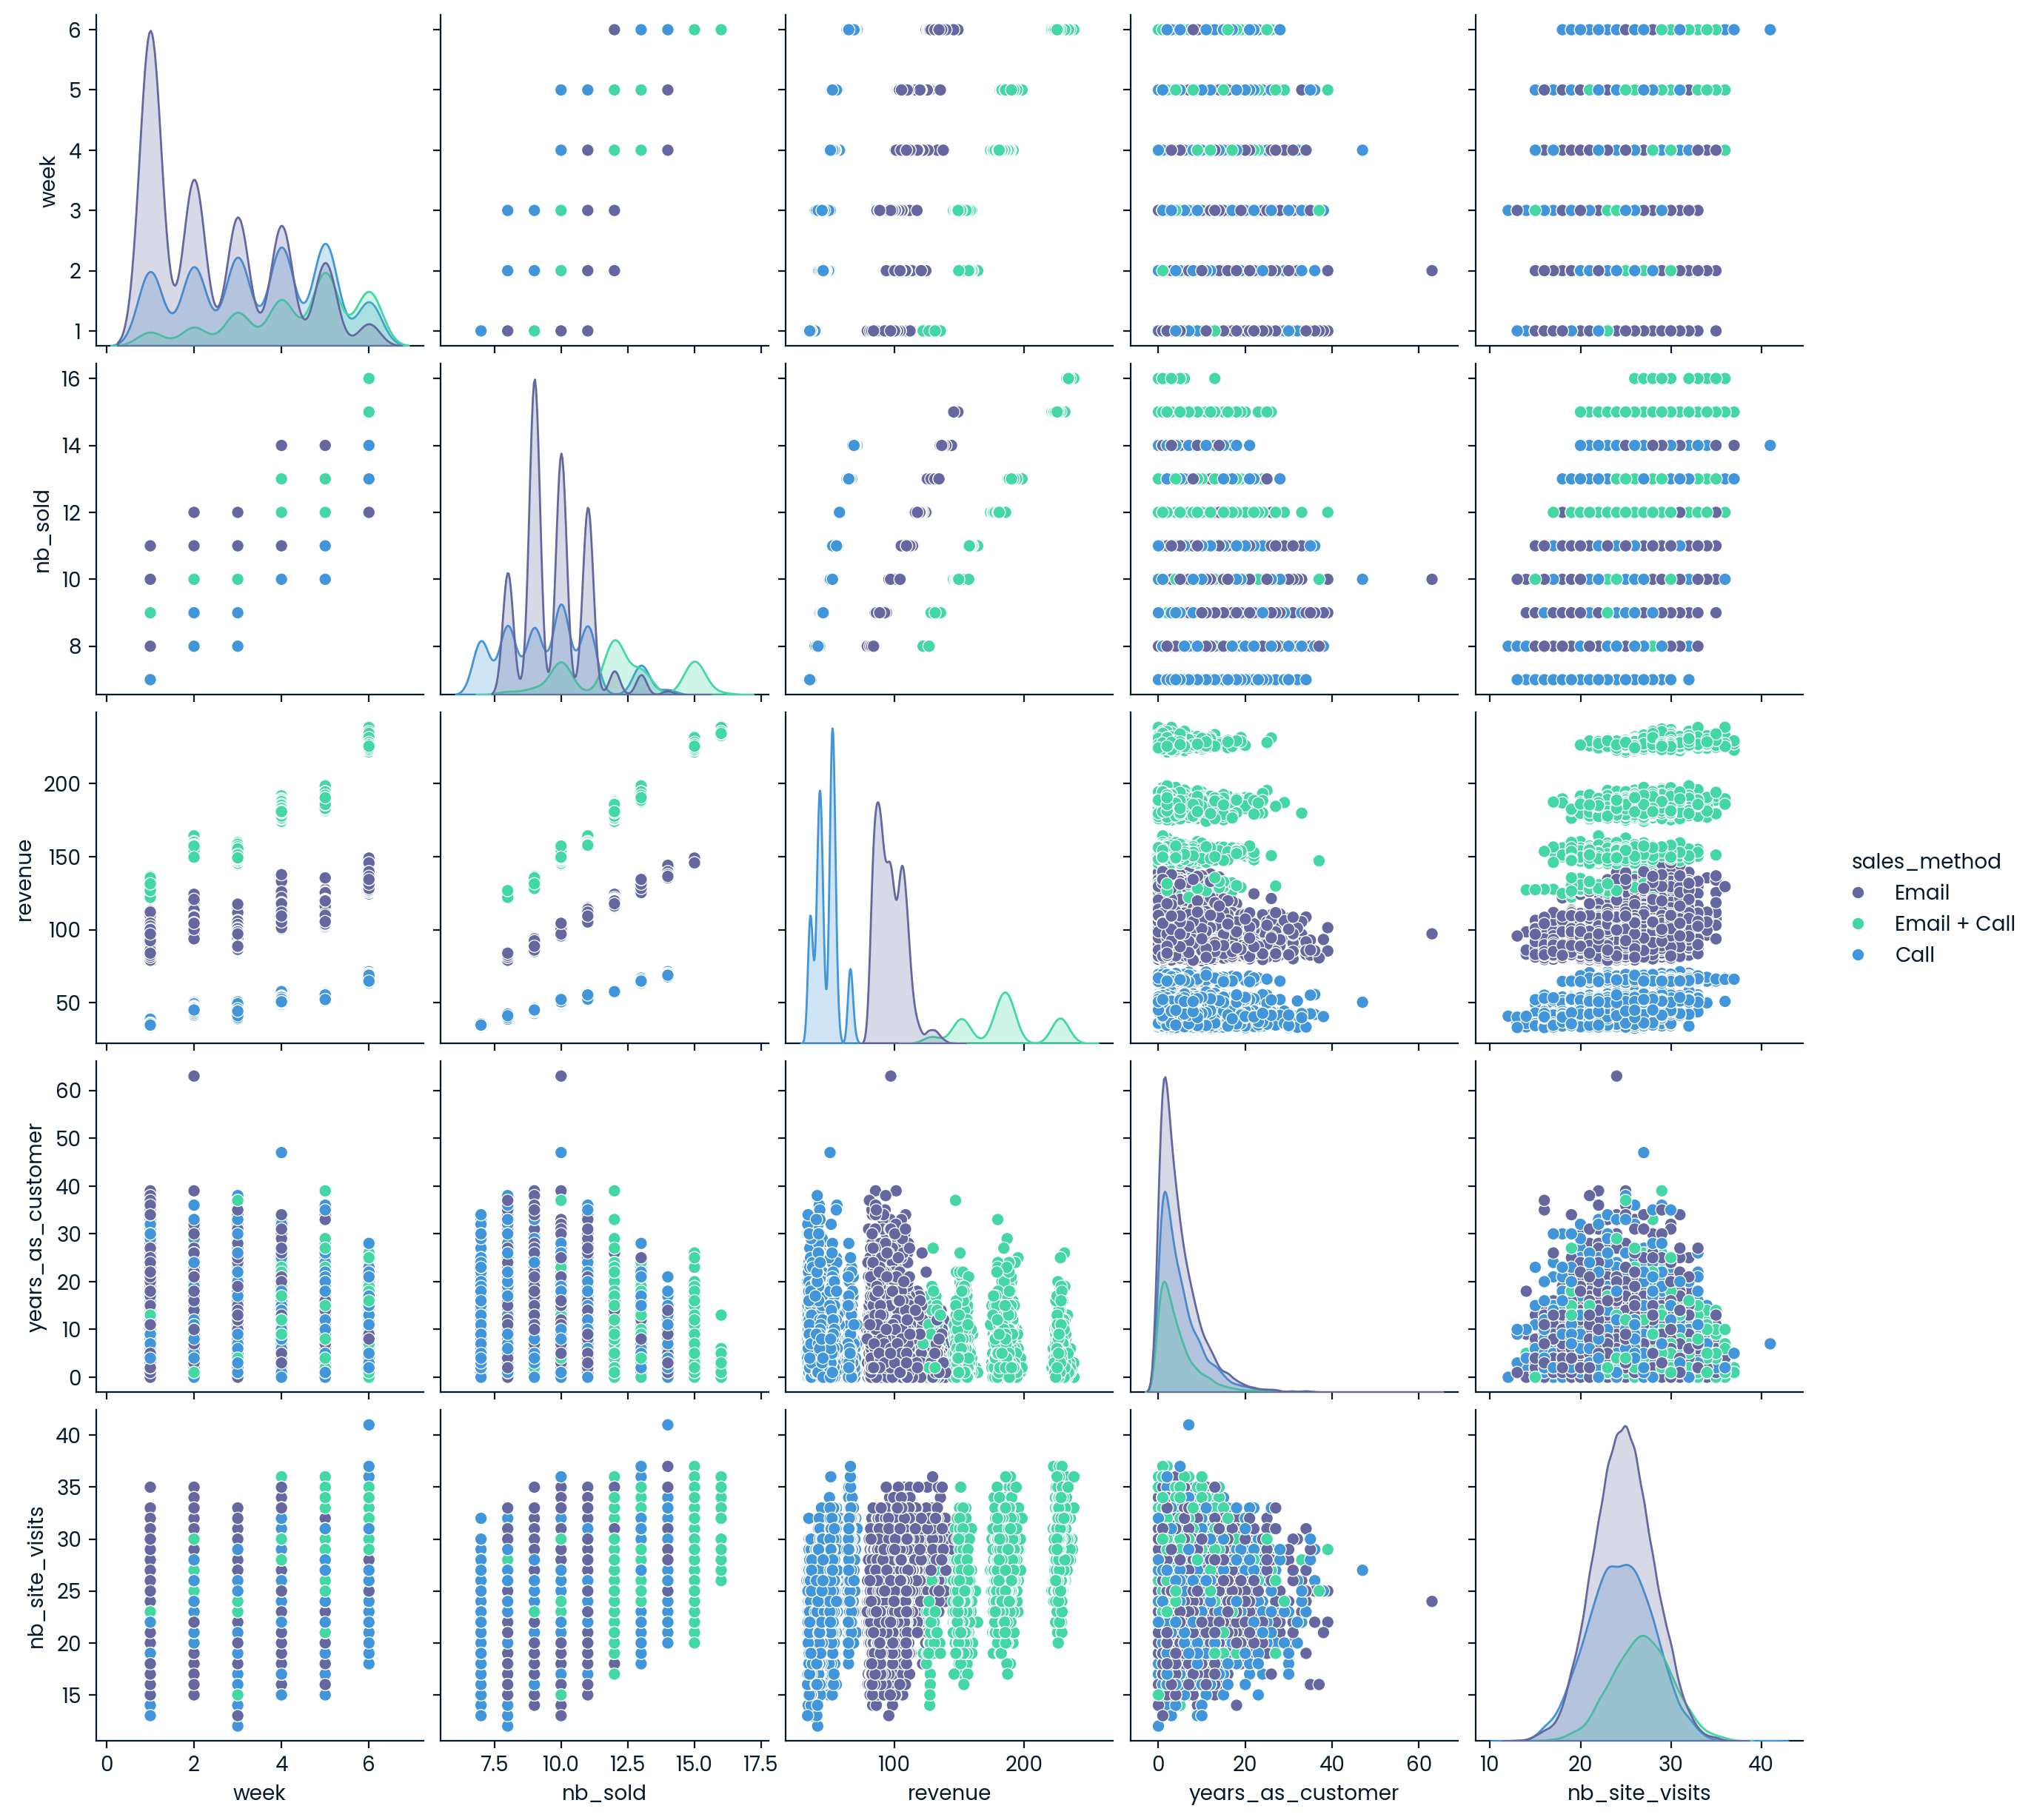

In [11]:
sns.pairplot(sales, hue='sales_method')
plt.show()

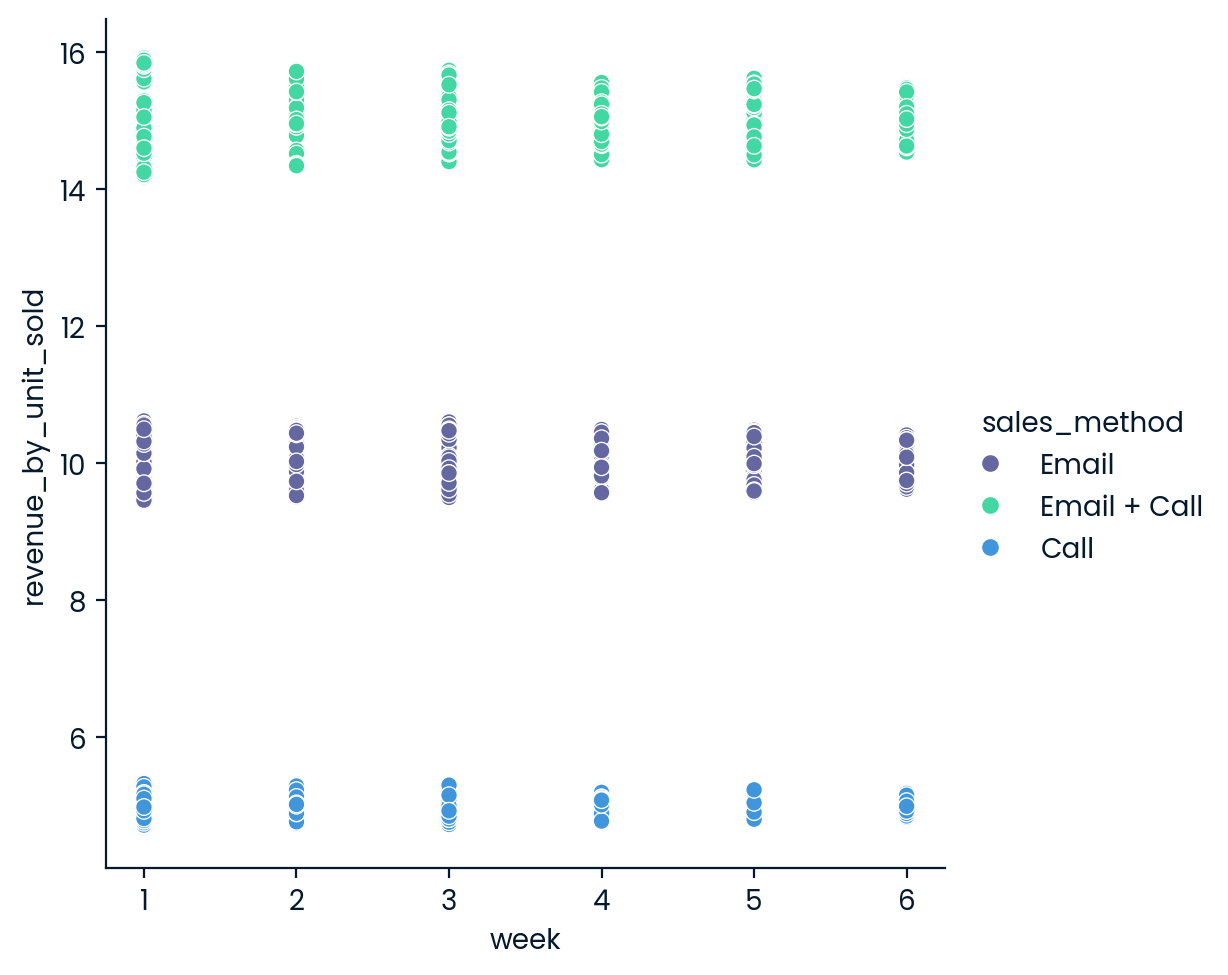

In [12]:
# 'revenue' seems to be heavily dependent on both 'nb_sold' and 'sales_method'
# Create a new column to show 'revenue' divided by 'nb_sold'
# Check whether 'week' has any visible effect on the mean of (revenue / nb_sold) grouped by sales_method 
sales['revenue_by_unit_sold'] = sales['revenue'] / sales['nb_sold']
sns.relplot(data=sales, y='revenue_by_unit_sold', x='week', hue='sales_method')
plt.show()

In [13]:
# As 'revenue' appears to be dependent on 'nb_sold' and 'sales_method', let us impute 
# the mean of 'revenue_by_unit_sold' for each 'sales_method' into the new 'revenue_by_unit_sold' column
# then multiply this imputed value by 'nb_sold' to return revenue per customer values to impute into the 'revenue' column.
# Round the imputed value to 2 decimals to match the rest of the data.
sales['revenue_by_unit_sold'] = sales.groupby('sales_method')['revenue_by_unit_sold']\
    .transform(lambda x: x.fillna(x.mean()))
sales['revenue'] = sales['revenue'].fillna(round(sales['revenue_by_unit_sold'] * sales['nb_sold'], 2))
# Drop the column revenue_by_unit_sold
sales.drop("revenue_by_unit_sold", axis=1, inplace=True)
# Check for missing values
sales.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [14]:
# The maximum year for years_as_customer is 63 which is superior to the years since foundation of company
years_since_foundation = 2025 - 1984        # 2025 is the current year
print(f"Years since foundation: {years_since_foundation}")
impossible_values = sales[(sales.years_as_customer < 0) | (sales.years_as_customer > years_since_foundation)]['years_as_customer']
print(f"Impossible values for years_as_customer:\n{impossible_values}")

Years since foundation: 41
Impossible values for years_as_customer:
13741    63
13800    47
Name: years_as_customer, dtype: int64


In [15]:
# Replace the 2 values superior to the maximum possible years_as_customer with the maximum possible years (41)
sales.years_as_customer = sales["years_as_customer"].where(sales["years_as_customer"] < years_since_foundation, 
                                 years_since_foundation)
print(sales["years_as_customer"].max())

41


In [16]:
print(sales["years_as_customer"].value_counts())

1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
33       8
34       8
28       8
31       6
32       5
29       5
35       5
36       4
39       3
38       2
37       2
41       2
Name: years_as_customer, dtype: int64


In [17]:
sales.nb_site_visits.value_counts()

25    1688
26    1645
24    1601
23    1478
27    1440
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
12       1
41       1
Name: nb_site_visits, dtype: int64

In [18]:
sales.state.value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [20]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,95.731264,4.964067,24.990867
std,1.656420,1.812213,48.395776,5.028153,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.760000,1.000000,23.000000
50%,3.000000,10.000000,90.020000,3.000000,25.000000
75%,5.000000,11.000000,108.630000,7.000000,27.000000
max,6.000000,16.000000,241.200000,41.000000,41.000000


In [21]:
sales.nunique()

week                     6
sales_method             3
customer_id          15000
nb_sold                 10
revenue               6757
years_as_customer       41
nb_site_visits          27
state                   50
dtype: int64

## Data Validation
The dataset contains 15000 rows and 8 columns before cleaning and validation. I have validated all the columns against the criteria in the dataset table:
- **week**: 6 unique values representing the weeks since product launch labeled 1 to 6 without missing values. No cleaning required
- **sales_method**: Character, 5 unique values before cleaning which does not match the description of three sales methods. The distinct values before cleaning were: "Email", "Call", "Email + "Call", "em + call", and "email". All rows displaying "em + call" were updated to "Email + Call" and rows displaying "email were updated to "Email". After cleaning, there are 3 categories of sales methods matching the description. No missing values.
- **customer_id**: Character, unique identifier for the customer without missing values. 15000 unique values, all 36 characters long, one unique value for each customer. No cleaning required
- **nb_sold**: Numeric values, all positive integers, without missing values, same as description. No cleaning required
- **revenue**: Numeric values with 1074 missing values before cleaning. As there are multiple different products, the revenue will vary depending on which products were sold. However, the revenue per unit sold, has a distinct distribution for each of the 3 sales methods. Thus I created a new column 'revenue_by_unit_sold' equal to 'revenue' divided by 'nb_sold'. I then filled missing values in this new column with the mean of 'revenue_by_unit_sold' for each 'sales_method'. I then filled the missing values in the 'revenue' column with these mean 'revenue_by_unit_sold' by 'sales_method' multiplied by 'nb_sold'. The new values were rounded to 2 decimals to match the rest of the data. The 'revenue_by_unit_sold' column was dropped. No missing values after cleaning
- **years_as_customer**: Numeric values, all positive integers without missing values. However 2 values are greater than the number of years since the foundation of the company Pens and Printers. These values were replaced with the maximum possible value being the number of years since the foundation of the company.
- **nb_site_visits**: Numeric values, all positive integers without missing values, same as description. No cleaning required
- **state**: Character, 50 unique values, matching the 50 states, without missing values, same as description. No cleaning required.

After data validation, the dataset contains 15000 rows and 8 columns without missing values.


## Exploratory Analysis

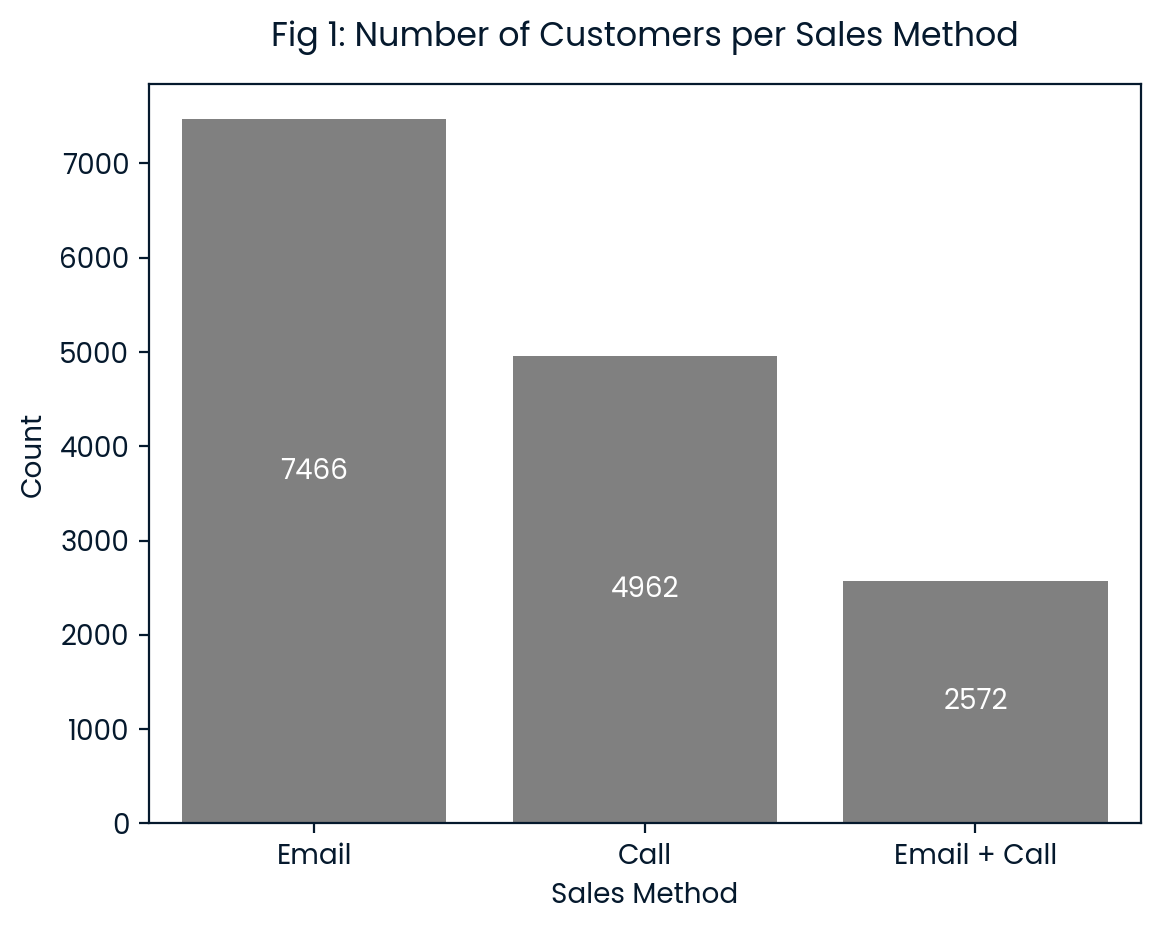

In [22]:
# How many customers were there for each approach?
customers_by_method = sns.countplot(data=sales,
                                    x='sales_method',
                                    color='grey',
                                    order=sales['sales_method'].value_counts().index)
for p in customers_by_method.patches:
    customers_by_method.text(p.get_x() + p.get_width() / 2.,
            p.get_y() + p.get_height() / 2.,
            '{:.0f}'.format(p.get_height()),
            ha='center',
            va='center',
            color='white')
customers_by_method.set_title("Fig 1: Number of Customers per Sales Method", y=1.03)
customers_by_method.set(xlabel="Sales Method",
                        ylabel="Count")
plt.show()

### How many customers were there for each approach?
- There were:
    - 7466 customers for the Email method
    - 4962 customers for the Call method
    - 2572 customers for the Email + Call method

![Fig1](Fig1.png)


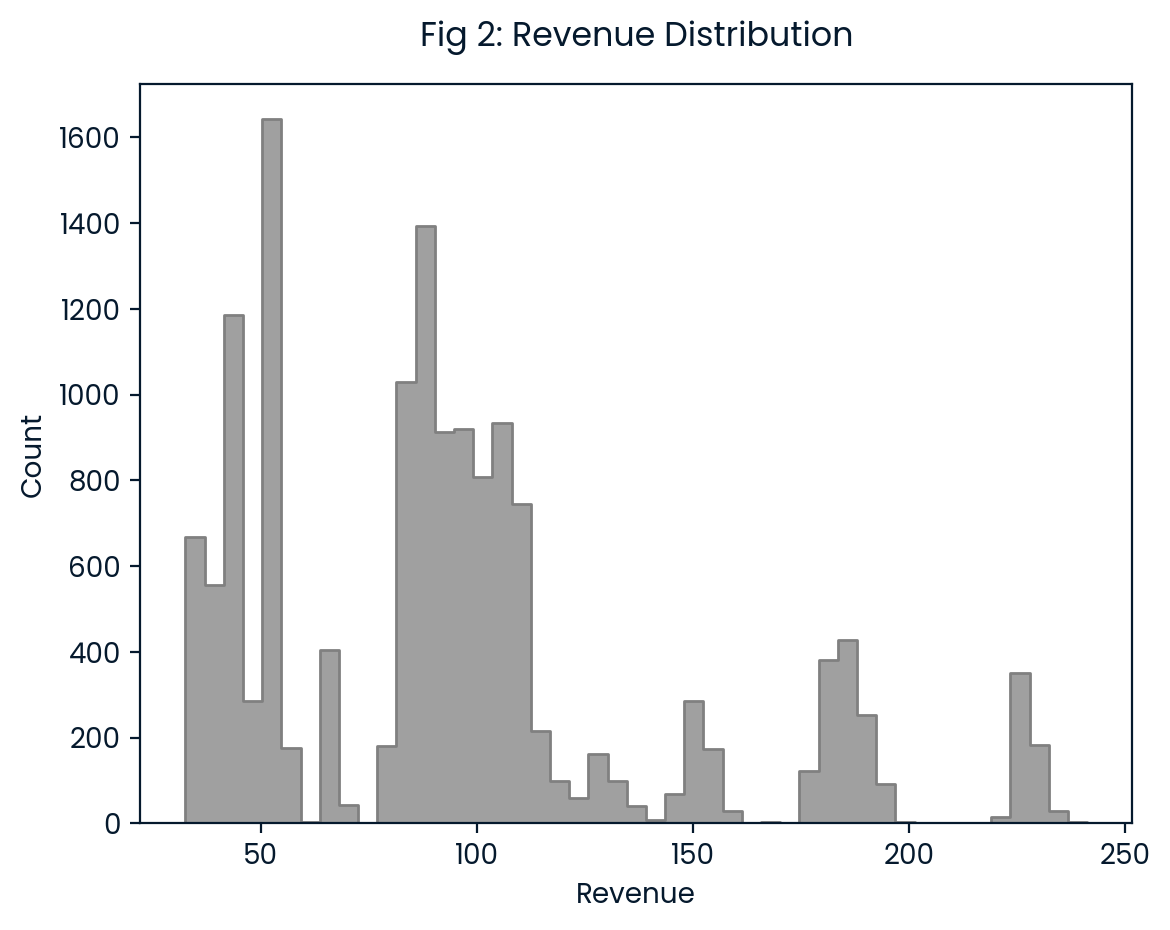

Minimum value in Revenue: 32.54
Maximum value in Revenue: 241.2


In [23]:
# What does the spread of the revenue look like overall?
revenue_dist = sns.histplot(data=sales, 
                            x='revenue', 
                            color='grey', 
                            element='step'
                            )
revenue_dist.set_title("Fig 2: Revenue Distribution", y=1.03)
revenue_dist.set(xlabel="Revenue")
plt.show()

print(f"Minimum value in Revenue: {sales['revenue'].min()}\
\nMaximum value in Revenue: {sales['revenue'].max()}")

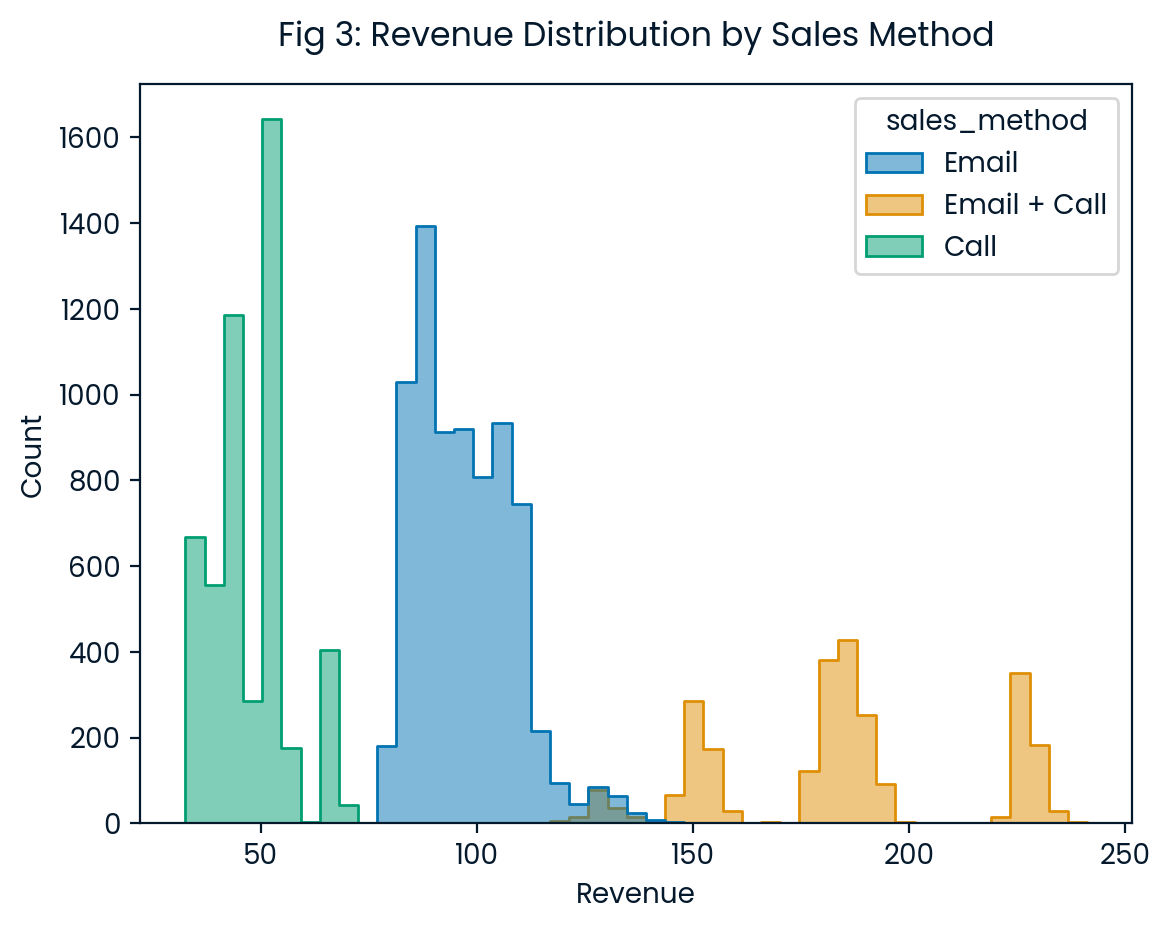

In [24]:
# What does the spread of the revenue look like for each method?
revenue_dist_method = sns.histplot(data=sales, 
                            x='revenue', 
                            hue='sales_method',
                            palette='colorblind', 
                            element='step',
                            alpha=0.5
                            )
revenue_dist_method.set_title("Fig 3: Revenue Distribution by Sales Method", y=1.03)
revenue_dist_method.set(xlabel="Revenue")
plt.show()

### What does the spread of the revenue look like overall? And for each method?
- The distribution for the revenue overall revenue appears to be multimodal and ranges from 32.54 to 241.2.

![Fig2](Fig2.png)

- When visualising the distribution of revenue for each method, we see:
    - There is a clear difference in the distributions of revenue for each sales method
    - The Email + Call method appears to be distributed at the higher end of the revenue spectrum
    - While the Call method appears to be distributed at the lower end.

![Fig3](Fig3.png)


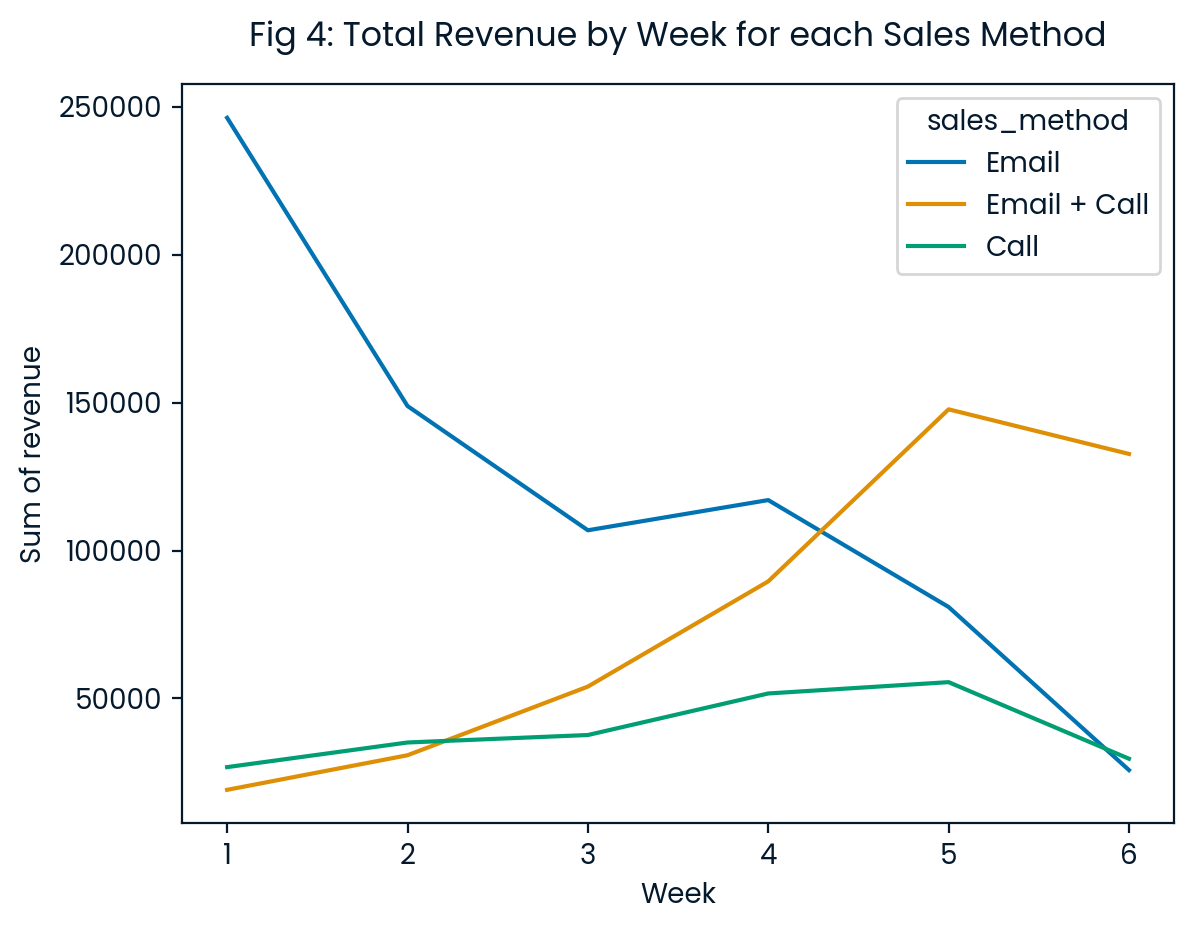

In [25]:
# Was there any difference in revenue over time for each of the methods?

# Total revenue by week for each sales_method:
total_revenue = sns.lineplot(data=sales, 
                            x="week", 
                            y='revenue', 
                            estimator='sum', 
                            errorbar=None, 
                            hue='sales_method',
                            palette='colorblind',
                            )
total_revenue.set_title("Fig 4: Total Revenue by Week for each Sales Method", y=1.03)
total_revenue.set(ylabel="Sum of revenue",
                  xlabel="Week")
plt.show()

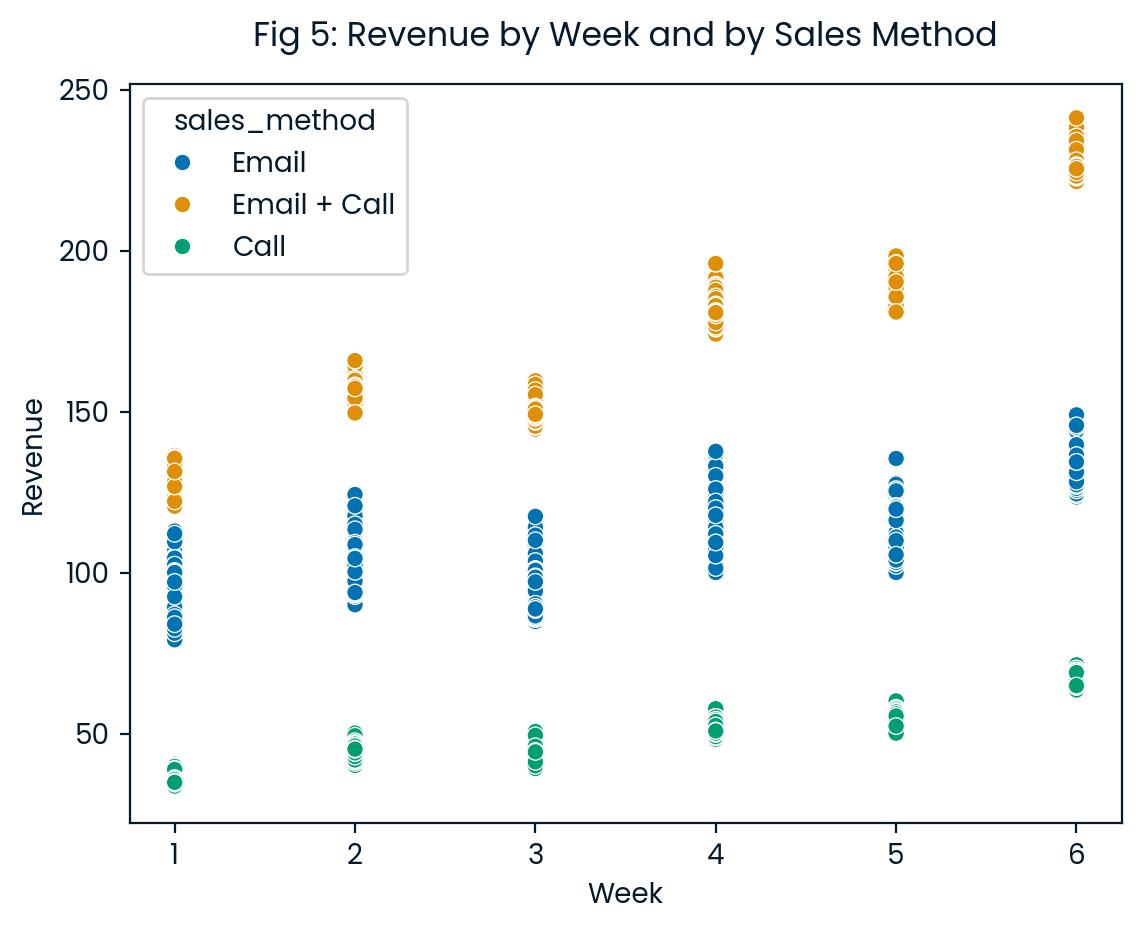

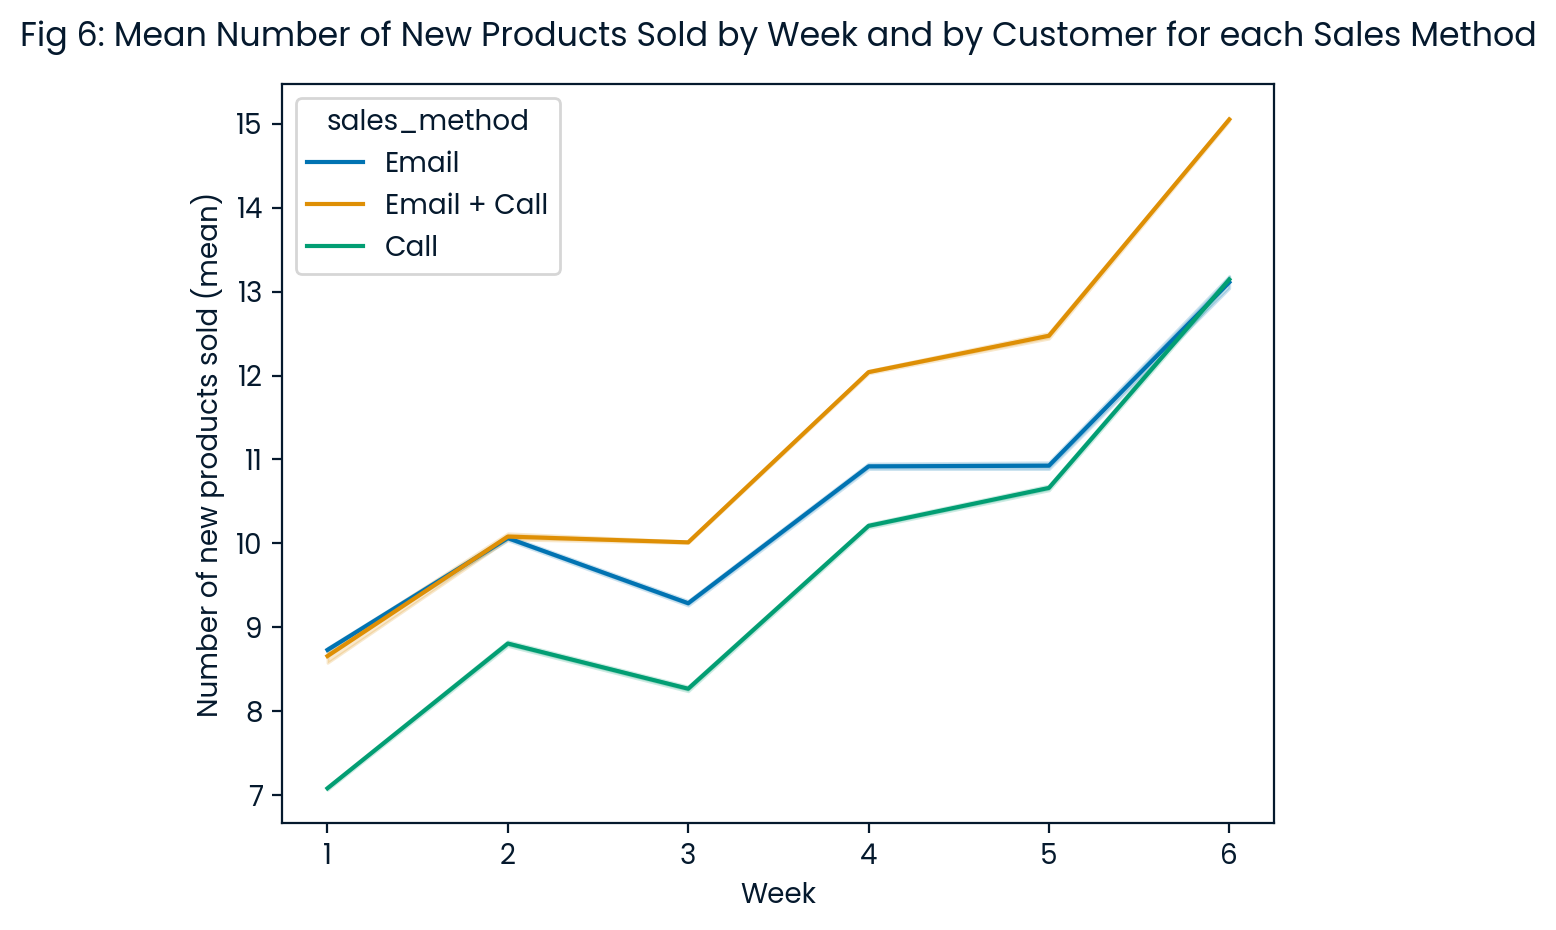

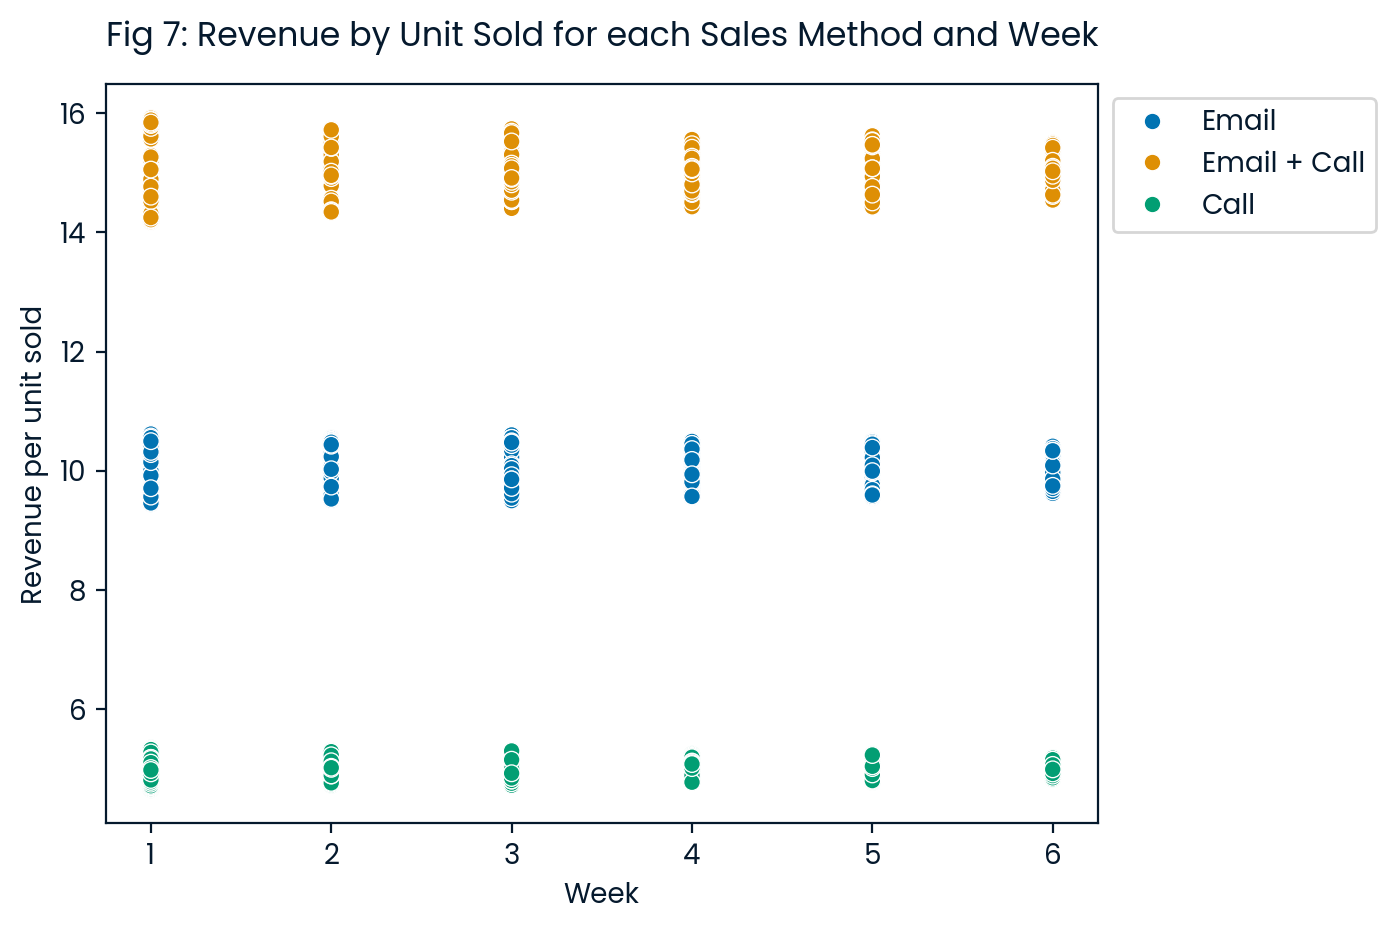

In [26]:
# Create new column 'revenue_by_unit_sold'
sales['revenue_by_unit_sold'] = sales['revenue'] / sales['nb_sold']

# Mean revenue by week for each sales_method:
mean_revenue = sns.scatterplot(data=sales, 
                            x="week", 
                            y='revenue',  
                            hue='sales_method',
                            palette='colorblind',
                            )
mean_revenue.set_title("Fig 5: Revenue by Week and by Sales Method", y=1.03)
mean_revenue.set(ylabel="Revenue",
                  xlabel="Week")
plt.show()

# Demonstrate that this is because of there being an evolution in nb_sold over the 6 weeks
mean_nb_sold = sns.lineplot(data=sales, 
                            x="week", 
                            y='nb_sold',   
                            hue='sales_method',
                            palette='colorblind',
                            )
mean_nb_sold.set_title("Fig 6: Mean Number of New Products Sold by Week and by Customer for each Sales Method", 
                       y=1.03)
mean_nb_sold.set(ylabel="Number of new products sold (mean)",
                  xlabel="Week")
plt.show()

# and that this is not due to revenue_by_unit_sold that is evolving
revenue_per_unit_sold = sns.scatterplot(data=sales, 
                                    y='revenue_by_unit_sold', 
                                    x='week', 
                                    hue='sales_method',
                                    palette='colorblind'
                                    )
revenue_per_unit_sold.set_title("Fig 7: Revenue by Unit Sold for each Sales Method and Week", 
                                y=1.03)
revenue_per_unit_sold.set(xlabel="Week",
                          ylabel="Revenue per unit sold")
revenue_per_unit_sold.legend(bbox_to_anchor=(1.001, 1), loc="upper left")
plt.show()



### Was there any difference in revenue over time for each of the methods?

- The total revenue per week shows different evolutions over the 6 weeks for each one of the methods (Fig 4).
    - **Email**: The total revenue bar chart shows that the email sent out when the product was launched was very effective in the first week with diminishing effect over the weeks. The follow-up Email 3 weeks later had some impact in boosting sales via Email in the fourth week with diminishing returns over the following weeks. Although this boost was only a fraction of the sales triggered by the Email sent at the launch of the new products.
    - **Email + Call**: The total revenue increases for the first 5 weeks for this method before dropping slightly in the $6^{th}$ week. The slow start to this method's impact on total revenue may in part be due to the week-long delay between the email being sent out and the call.
    - **Call**: Over the 6 weeks, it is the method that generated the lowest total revenue

![Fig4](Fig4.png)

- While the mean revenue generally increased for all three sales methods over the 6 weeks (Fig 5), this is mainly due to the number of new products sold increased over the 6 weeks (Fig 6). 
- The mean revenue per unit sold saw no significant change for each of the sales methods over the 6 weeks since the new products launch (Fig 7).

![Fig5](Fig5.png)

![Fig6](Fig6.png)

- Fig 7 shows that the mean revenue per unit sold for each sales method did not significantly evolve over the 6 weeks. It also shows:
    - the mean revenue per unit sold for the Call method is only about half that of the Email method
    - and only about a third of the Email + Call method. 

![Fig7](Fig7.png)


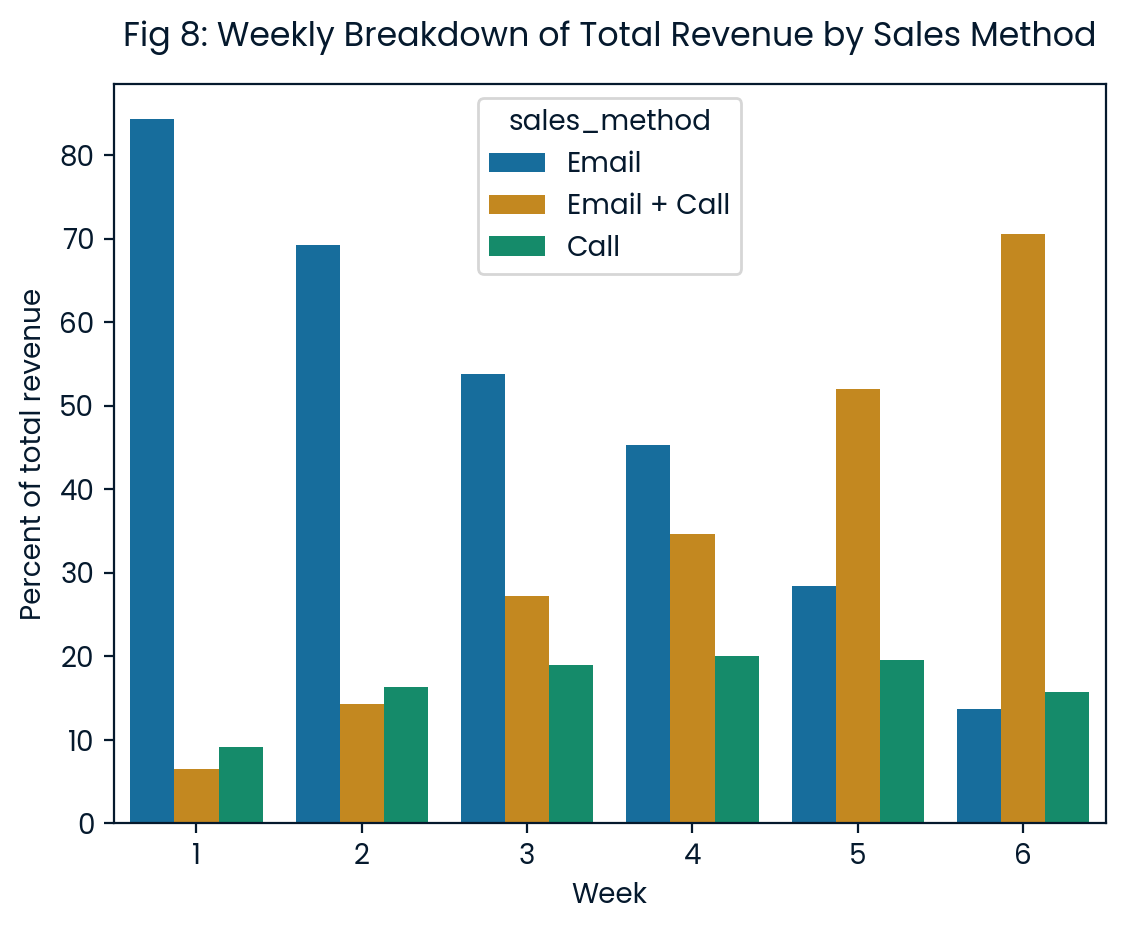

In [27]:
tot_revenues = sales.groupby(['week', 'sales_method'])['revenue'].sum()
perc_revenue = tot_revenues.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()), 2))
perc_revenue = perc_revenue.to_frame().reset_index()

business_metric = sns.barplot(data=perc_revenue, 
                              x='week',
                              y='revenue',
                              hue='sales_method',
                              palette='colorblind',
                              hue_order=['Email', 'Email + Call', 'Call']
                              )
business_metric.set_title("Fig 8: Weekly Breakdown of Total Revenue by Sales Method", y=1.03)
business_metric.set(ylabel="Percent of total revenue",
                    xlabel="Week")
plt.show()

## Business Metrics
Since our goal is to understand which combination of sales methods is best and how they evolve over time, I would recommend we use the **percentage of total revenue by week that each sales method represents** as our metrics to assess the evolution of the perfomance of each sales method and thus its relevance going forwards.

Below (Fig 8), we see how this metric for each of the sales method over the first 6 weeks after launch shows the complementary strengths over time of the Email and the Email + call methods.

![Fig8](Fig8.png)


## Recommendations
For the following weeks, I would recommend the following steps:
- Drop the Call sales method. 
    - It generated the lowest mean revenue per unit sold (typically about half that of the Email method and only about a third of the Email + Call method)
    - While it was second in acquiring customers (4962 customers), it is the method that has generated the smallest total revenue over the full 6 weeks
    - From the information you sent me, it appears to be the most time consuming for your team.
- Keep the Email and Email + Call sales methods
    - Email: it has reached the most customers.
    - Email + Call: leads to the most revenue per unit sold.
    - Over these 6 weeks since the new products launch, 
        - the Email method has had a strong impact on total revenue at the start and faded over the weeks (except for the boost from the follow-up email 3 weeks later leading to a slightly increased total revenue in week 4 for this sales method).   
        - the total revenue from the Email + Call method has, on the other hand, generally increased over the 6 weeks, picking up as the total revenue from the Email method has faded.
- Data Collection for in-depth analysis
    - Improve data collection: 
        - avoid missing revenue values
        - start collecting data on work time spent on each sale to a customer for a more in-depth anaysis from a time and cost perspective



## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation